<a href="https://colab.research.google.com/github/Fatimakhanim/Machine-learning-Projects/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784",as_frame = False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X, y = mnist ["data"], mnist["target"]
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

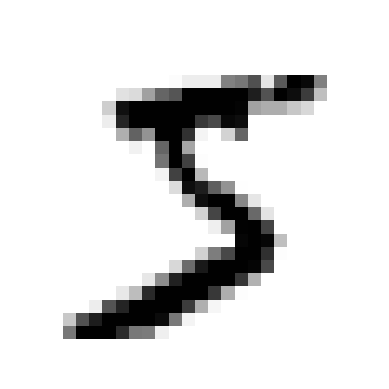

In [ ]:
import matplotlib.pyplot as plt
X.shape

def digit_image(digit):
  plt.imshow(digit.reshape(28,28),cmap = "binary")
  plt.axis("off")



digit_image(X[0])

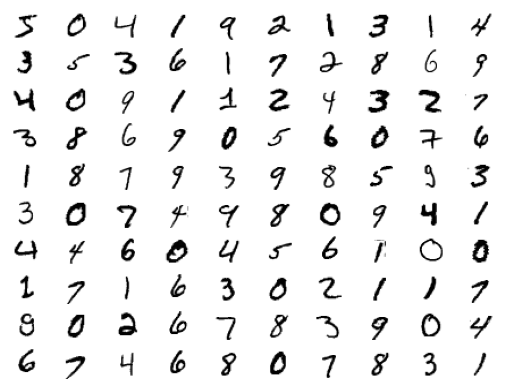

In [ ]:
for idx,image in enumerate(X[:100]):
  plt.subplot(10,10,idx+1)
  digit_image(X[idx])

In [ ]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [ ]:
y_train_5 = (y_train == "5")
y_test_5 = (y_test=="5")

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [ ]:
cross_val_score(sgd_clf,X_test,y_test_5,cv = 3)

array([0.95110978, 0.95439544, 0.96879688])

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [ ]:
cross_val_score(dummy_clf,X_train,y_train_5,cv = 3)

array([0.90965, 0.90965, 0.90965])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv = 3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [ ]:
f1_score(y_train_5,y_train_pred)

0.7325171197343846

#Presicion/Recall Trade-off

In [ ]:
some_digit = X[0]

In [ ]:
some_digit = X[0]
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [ ]:
threshold = 3000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv = 3,
                             method = "decision_function")

In [ ]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions ,recalls, threshold = precision_recall_curve(y_train_5,y_scores)

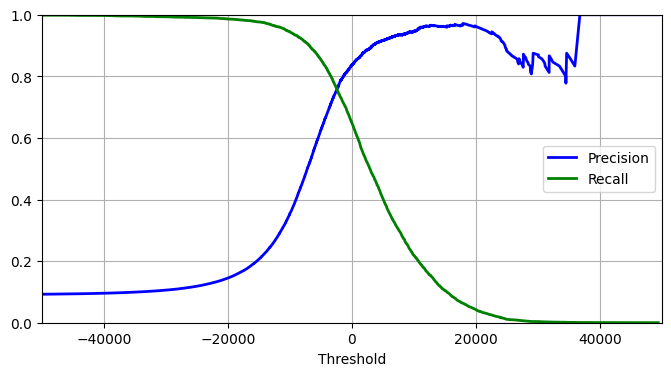

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(threshold,precisions[:-1],"b-",label = "Precision",linewidth =2)
plt.plot(threshold,recalls[:-1],"g-",label = "Recall",linewidth =2)
plt.axis([-50000,50000,0,1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc = "center right")


plt.show()

In [ ]:
idx_for_90_precision=(precisions>=0.90).argmax()
idx_for_90_precision

57109

In [ ]:
threshold_for_90_precision=threshold[idx_for_90_precision]

In [ ]:
threshold_for_90_precision

3370.0194991439557

In [ ]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [ ]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)

In [ ]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5 , cv = 3,
                                    method = "predict_proba")

In [ ]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest,thresholds_forest = precision_recall_curve(y_train_5,y_scores_forest)

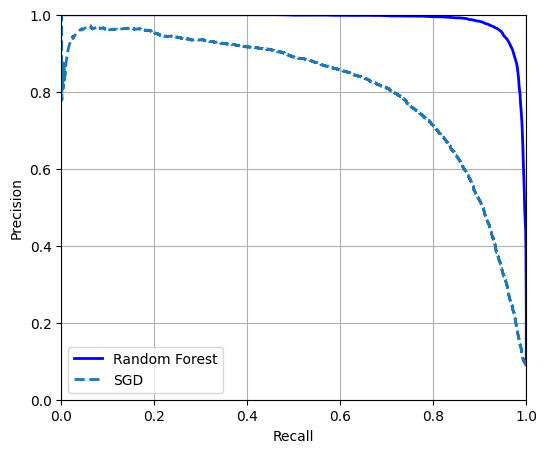

In [ ]:
plt.figure(figsize = (6,5))

plt.plot(recalls_forest,precisions_forest,"b-",linewidth = 2,
         label = "Random Forest")
plt.plot(recalls,precisions,"--",linewidth = 2,label ="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc = "lower left")

plt.show()

In [ ]:
y_train_pred_forest = y_probas_forest[:,1]>=0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

In [ ]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

#Multiclass Classification

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train[:2000],y_train[:2000])


SVC(random_state=42)

In [ ]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [ ]:
class_id = some_digit_scores.argmax()
class_id

5

In [ ]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state = 42))
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
sgd_clf = SGDClassifier(random_state=42)

In [ ]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [ ]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [ ]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv = 3,scoring = "accuracy")

array([0.8983, 0.891 , 0.9018])

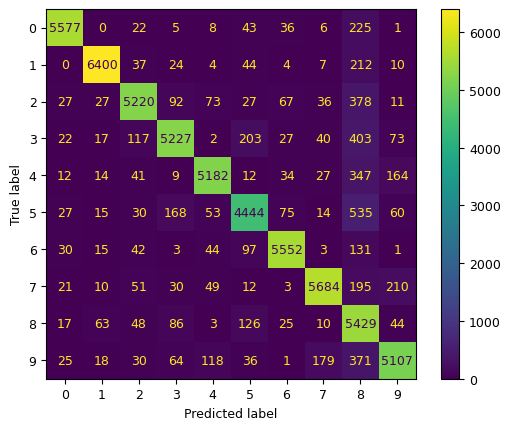

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv = 3)
plt.rc("font" , size = 9)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

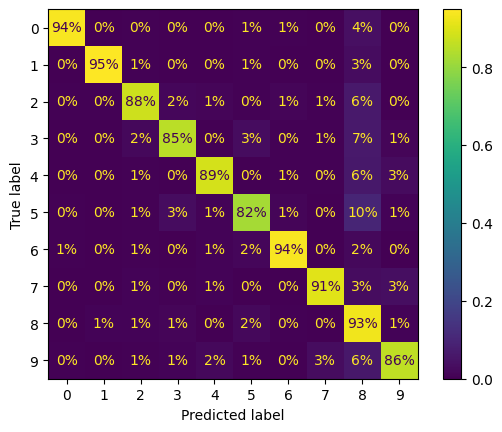

In [ ]:
plt.rc("font" , size = 10)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,
                                        normalize="true",values_format=".0%")
plt.show()

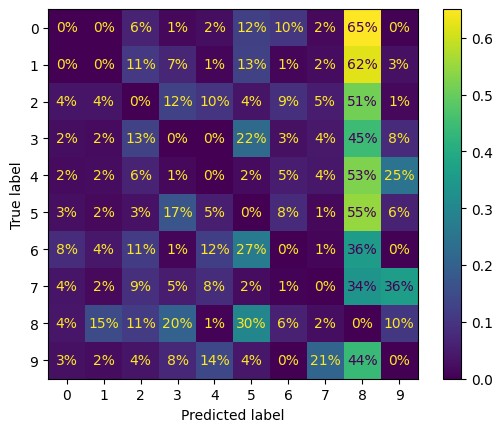

In [ ]:
sample_weight = (y_train_pred!=y_train)
plt.rc("font" , size = 10)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,
                                        sample_weight = sample_weight,normalize = "true",values_format = ".0%")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNC=KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.preprocessing import StandardScaler

#Multilabel Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train>="7")
y_train_odd = (y_train.astype("int8") % 2 ==1 )
y_multilabel = np.c_[y_train_large,y_train_odd]
KNC=KNeighborsClassifier()
KNC.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [ ]:
KNC.predict([some_digit])

array([[False,  True]])